<a href="https://colab.research.google.com/github/matheustoneti/MachinePredictiveMaintenanceClassification/blob/main/Machine_Predictive_Maintenance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv('predictive_maintenance.csv')

In [3]:
data.head(100)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
95,96,M14955,M,299.0,309.0,1351,52.2,44,0,No Failure
96,97,M14956,M,299.0,309.0,1575,35.3,47,0,No Failure
97,98,M14957,M,298.9,308.9,1750,29.9,50,0,No Failure
98,99,L47278,L,298.9,308.8,1529,32.7,53,0,No Failure


In [4]:
data = data.drop(['Product ID'], axis=1)


In [5]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Target                   10000 non-null  int64  
 8   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(2)
memory usage: 703.2+ KB


In [6]:
dataF = (data['Target'] == 1).sum()
dataN = (data['Target'] == 0).sum()
total = dataN + dataF
print(f"{dataF} ({100*dataF/total:.2f}%) of the total machine failure in the dataset")
print(f"{dataN} ({100*dataN/total:.2f}%) of total machine working in the dataset")

339 (3.39%) of the total machine failure in the dataset
9661 (96.61%) of total machine working in the dataset


In [7]:
# Get unique values in the "Failure Type" column
unique_failure_types = data['Failure Type'].unique()

print(unique_failure_types)


['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [8]:
data


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...
9995,9996,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H,299.0,308.7,1408,48.5,25,0,No Failure


In [9]:


# Creating the new column
#data['is_failure'] = data['Failure Type'].apply(lambda x: 0 if x == 'No Failure' else 1)

 
# Convert "Failure Type" column to one-hot encoded columns
#df_one_hot = pd.get_dummies(data['Failure Type'], prefix='Type')

# Concatenate the one-hot encoded columns back to the original DataFrame (optional)
#data = pd.concat([data, df_one_hot], axis=1)

# Drop the original "Failure Type" column (optional)
#data.drop('Failure Type', axis=1, inplace=True)


In [10]:
data


,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...
9995,9996,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H,299.0,308.7,1408,48.5,25,0,No Failure


In [11]:
# Convert "Failure Type" column to one-hot encoded columns
df_one_hot = pd.get_dummies(data['Type'], prefix='Type_')

# Concatenate the one-hot encoded columns back to the original DataFrame (optional)
data = pd.concat([data, df_one_hot], axis=1)

# Drop the original "Failure Type" column (optional)
data.drop('Type', axis=1, inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
 8   Type__H                  10000 non-null  uint8  
 9   Type__L                  10000 non-null  uint8  
 10  Type__M                  10000 non-null  uint8  
dtypes: float64(3), int64(4), object(1), uint8(3)
memory usage: 654.4+ KB


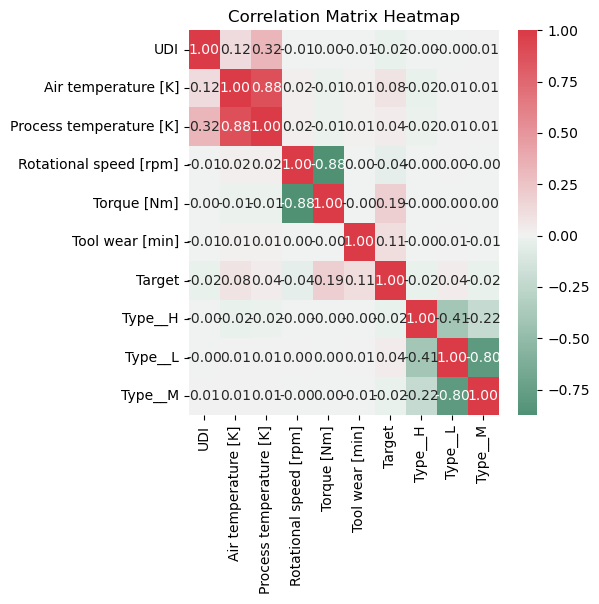

In [13]:
df = pd.DataFrame(data)
df.drop('Failure Type', axis=1, inplace=True)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a figure and axes with a specific size
fig, ax = plt.subplots(figsize=(5, 5))

# Create a custom colormap from green (low correlation) to red (high correlation)
cmap = sns.diverging_palette(150, 10, as_cmap=True)

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, center=0, ax=ax)

# Set the title
ax.set_title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

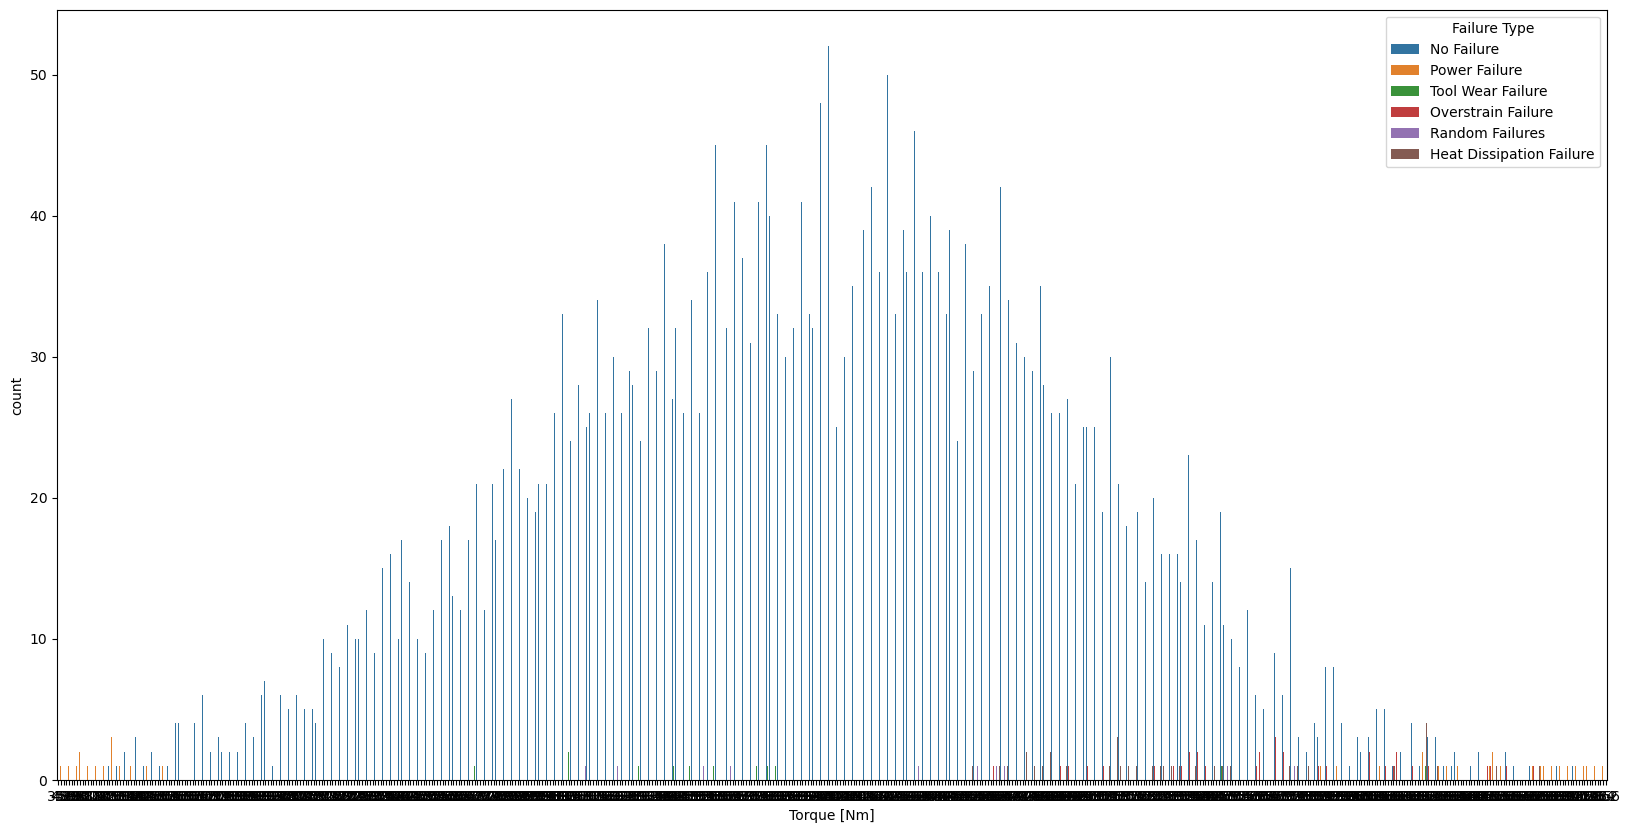

In [14]:
axe, fig = plt.subplots(figsize = (20,10))
axe = sns.countplot(x= data['Torque [Nm]'], hue = data['Failure Type'])

In [15]:
data_pair_plot = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Failure Type']]

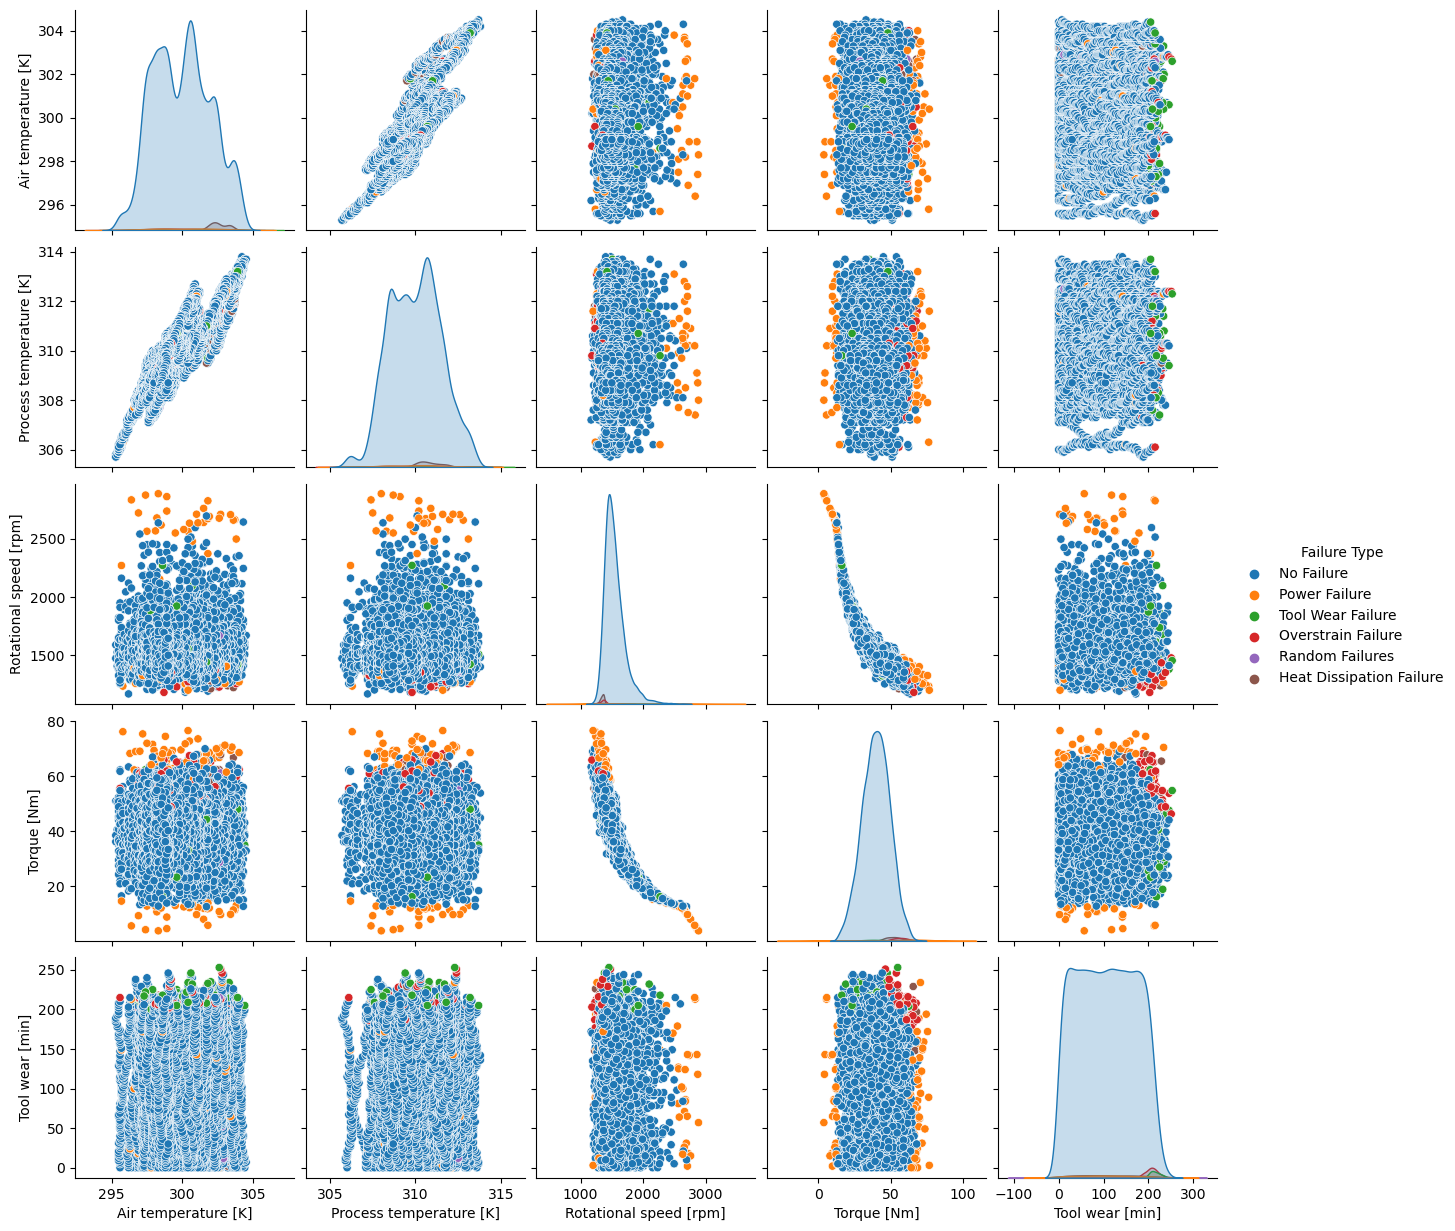

In [16]:
sns.pairplot(data = data_pair_plot, hue = 'Failure Type')

In [17]:
le = preprocessing.LabelEncoder()
# data['Type'] = le.fit_transform(data['Type'])
data['Failure Type'] = le.fit_transform(data['Failure Type'])
unique_failure_types = data['Failure Type'].unique()

print(unique_failure_types)

[1 3 5 2 4 0]


In [18]:
data.head(50)

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type__H,Type__L,Type__M
0,1,298.1,308.6,1551,42.8,0,0,1,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,1,0,1,0
2,3,298.1,308.5,1498,49.4,5,0,1,0,1,0
3,4,298.2,308.6,1433,39.5,7,0,1,0,1,0
4,5,298.2,308.7,1408,40.0,9,0,1,0,1,0
5,6,298.1,308.6,1425,41.9,11,0,1,0,0,1
6,7,298.1,308.6,1558,42.4,14,0,1,0,1,0
7,8,298.1,308.6,1527,40.2,16,0,1,0,1,0
8,9,298.3,308.7,1667,28.6,18,0,1,0,0,1
9,10,298.5,309.0,1741,28.0,21,0,1,0,0,1


In [19]:
y = data['Target']
x = data.drop(['Target'], axis = 1)

In [20]:
x.head(10)

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Type__H,Type__L,Type__M
0,1,298.1,308.6,1551,42.8,0,1,0,0,1
1,2,298.2,308.7,1408,46.3,3,1,0,1,0
2,3,298.1,308.5,1498,49.4,5,1,0,1,0
3,4,298.2,308.6,1433,39.5,7,1,0,1,0
4,5,298.2,308.7,1408,40.0,9,1,0,1,0
5,6,298.1,308.6,1425,41.9,11,1,0,0,1
6,7,298.1,308.6,1558,42.4,14,1,0,1,0
7,8,298.1,308.6,1527,40.2,16,1,0,1,0
8,9,298.3,308.7,1667,28.6,18,1,0,0,1
9,10,298.5,309.0,1741,28.0,21,1,0,0,1


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = (0.3))

In [22]:
modelo = GradientBoostingClassifier()

In [23]:
modelo = modelo.fit(x_train, y_train)

In [24]:
accuracy = modelo.score(x_test, y_test)

In [126]:
print(accuracy)

0.9983333333333333


In [25]:
import joblib

# Save the model to a file
joblib.dump(modelo, 'modelo_gradient_boosting.pkl')

['modelo_gradient_boosting.pkl']